In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn import metrics


In [503]:
df = pd.read_csv('2002_2019_EVERYTHING.csv', sep=',')

In [18]:
df = pd.read_csv('all_data_2011_2019.cvs', sep=',')

In [420]:
df = pd.read_csv('1993_2019_everything2.csv', sep=',')

In [546]:
df1.columns

Index(['point_difference', 'team_seed', 'win', 'higher_or_lower_seed', 'BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG',
       'other_team_seed', 'SRS_adv', 'SOS_adv', 'eFG_perc_adv',
       'SRS_adv_opponent', 'SOS_adv_opponent', 'eFG_perc_adv_opponent',
       'SRS_adv_subtracted', 'SOS_adv_subtracted', 'eFG_perc_adv_subtracted',
       'BLKPG_opponent', 'STPG_opponent', 'APG_opponent', 'AST_TO_opponent',
       '_3pm_opponent', '_3pa_opponent', '_2pm_opponent', '_2pa_opponent',
       '_2p_perc_opponent', 'FG_perc_opponent', '_3p_perc_opponent',
       'FT_perc_opponent', 'ORPG_opponent', 'DRPG_opponent', 'RPG_opponent',
       'BLKPG_subtracted', 'STPG_subtracted', 'APG_subtracted',
       'AST_TO_subtracted', '_3pm_subtracted', '_3pa_subtracted',
       '_2pm_subtracted', '_2pa_subtracted', '_2p_perc_subtracted',
       'PTS_opponent', 'PTS_subtracted', 'FG_perc_subtracted',


In [505]:
df1=df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'winner','year_kenpom', 'name_x','name_y','other_team_seed_opponent',
        'result',  'index', 'year_x', 'Name', 'year_y','year_adv','names_for_merging_ken',
        'names_for_merging_sr', 'index_everything', 'name_y'], axis = 1)

In [510]:
df1.head(1)

,point_difference,team_seed,win,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,eFG_perc_adv,SRS_adv_opponent,SOS_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,eFG_perc_adv_subtracted,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,BLKPG_subtracted,STPG_subtracted,APG_subtracted,AST_TO_subtracted,_3pm_subtracted,_3pa_subtracted,_2pm_subtracted,_2pa_subtracted,_2p_perc_subtracted,PTS_opponent,PTS_subtracted,FG_perc_subtracted,_3p_perc_subtracted,FT_perc_subtracted,ORPG_subtracted,DRPG_subtracted,RPG_subtracted,round,name_ken,wins,losses,kenpom_adjem,wins_opponent,losses_opponent,kenpom_adjem_opponent,wins_subtracted,losses_subtracted,kenpom_adjem_subtracted
0,15,1,1,1,6.27,8.4,20.4,1.48,6.0,16.0,733.0,1404.0,0.522,85.3,0.483,0.37,0.71,13.5,28.1,41.6,16,23.5,9.38,0.53,-2.74,-3.71,0.478,26.24,13.09,0.052,4.21,5.44,12.7,0.83,7.0,20.0,559.0,1234.0,0.453,0.415,0.347,0.742,11.2,26.6,37.9,2.06,2.96,7.7,0.65,-1.0,-4.0,174.0,170.0,0.069,69.6,15.7,0.068,0.023,-0.032,2.3,1.5,3.7,1,Maryland,32.0,4.0,29.25,17.0,19.0,-1.21,15.0,-15.0,30.46


In [511]:
df1=df1.drop(['name_ken'], axis = 1)

In [428]:
df1.columns

Index(['point_difference', 'team_seed', 'win', 'higher_or_lower_seed', 'BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG',
       'other_team_seed', 'SRS_adv', 'SOS_adv', 'eFG_perc_adv', 'year_adv',
       'SRS_adv_opponent', 'SOS_adv_opponent', 'eFG_perc_adv_opponent',
       'SRS_adv_subtracted', 'SOS_adv_subtracted', 'eFG_perc_adv_subtracted',
       'BLKPG_opponent', 'STPG_opponent', 'APG_opponent', 'AST_TO_opponent',
       '_3pm_opponent', '_3pa_opponent', '_2pm_opponent', '_2pa_opponent',
       '_2p_perc_opponent', 'FG_perc_opponent', '_3p_perc_opponent',
       'FT_perc_opponent', 'ORPG_opponent', 'DRPG_opponent', 'RPG_opponent',
       'other_team_seed_opponent', 'BLKPG_subtracted', 'STPG_subtracted',
       'APG_subtracted', 'AST_TO_subtracted', '_3pm_subtracted',
       '_3pa_subtracted', '_2pm_subtracted', '_2pa_subtracted',
       '_2p_perc_subtracted', 'PTS_opponent', 

In [545]:
df1.to_csv('df1.csv')

In [575]:
df1.head(5)

,point_difference,team_seed,win,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,eFG_perc_adv,SRS_adv_opponent,SOS_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,eFG_perc_adv_subtracted,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,BLKPG_subtracted,STPG_subtracted,APG_subtracted,AST_TO_subtracted,_3pm_subtracted,_3pa_subtracted,_2pm_subtracted,_2pa_subtracted,_2p_perc_subtracted,PTS_opponent,PTS_subtracted,FG_perc_subtracted,_3p_perc_subtracted,FT_perc_subtracted,ORPG_subtracted,DRPG_subtracted,RPG_subtracted,round,wins,losses,kenpom_adjem,wins_opponent,losses_opponent,kenpom_adjem_opponent,wins_subtracted,losses_subtracted,kenpom_adjem_subtracted
0,15,1,1,1,6.27,8.40,20.4,1.48,6.0,16.0,733.0,1404.0,0.522,85.3,0.483,0.370,0.710,13.5,28.1,41.6,16,23.50,9.38,0.530,-2.74,-3.71,0.478,26.24,13.09,0.052,4.21,5.44,12.7,0.83,7.0,20.0,559.0,1234.0,0.453,0.415,0.347,0.742,11.2,26.6,37.9,2.06,2.96,7.7,0.65,-1.0,-4.0,174.0,170.0,0.069,69.6,15.7,0.068,0.023,-0.032,2.3,1.5,3.7,1,32.0,4.0,29.25,17.0,19.0,-1.21,15.0,-15.0,30.46
1,15,16,0,0,4.21,5.44,12.7,0.83,7.0,20.0,559.0,1234.0,0.453,69.6,0.415,0.347,0.742,11.2,26.6,37.9,1,-2.74,-3.71,0.478,23.50,9.38,0.530,-26.24,-13.09,-0.052,6.27,8.40,20.4,1.48,6.0,16.0,733.0,1404.0,0.522,0.483,0.370,0.710,13.5,28.1,41.6,-2.06,-2.96,-7.7,-0.65,1.0,4.0,-174.0,-170.0,-0.069,85.3,-15.7,-0.068,-0.023,0.032,-2.3,-1.5,-3.7,1,17.0,19.0,-1.21,32.0,4.0,29.25,-15.0,15.0,-30.46
2,1,8,1,1,1.87,5.80,12.7,0.98,6.6,19.0,492.0,1013.0,0.486,66.9,0.438,0.352,0.719,10.3,22.1,32.4,9,10.09,9.22,0.499,7.80,6.30,0.437,2.29,2.92,0.062,3.84,10.29,11.5,0.76,4.3,15.0,628.0,1437.0,0.437,0.401,0.287,0.667,15.7,22.1,37.8,-1.97,-4.49,1.2,0.22,2.3,4.0,-136.0,-424.0,0.049,70.3,-3.4,0.037,0.065,0.052,-5.4,0.0,-5.4,1,18.0,13.0,13.22,20.0,12.0,9.06,-2.0,1.0,4.16
3,1,9,0,0,3.84,10.29,11.5,0.76,4.3,15.0,628.0,1437.0,0.437,70.3,0.401,0.287,0.667,15.7,22.1,37.8,8,7.80,6.30,0.437,10.09,9.22,0.499,-2.29,-2.92,-0.062,1.87,5.80,12.7,0.98,6.6,19.0,492.0,1013.0,0.486,0.438,0.352,0.719,10.3,22.1,32.4,1.97,4.49,-1.2,-0.22,-2.3,-4.0,136.0,424.0,-0.049,66.9,3.4,-0.037,-0.065,-0.052,5.4,0.0,5.4,1,20.0,12.0,9.06,18.0,13.0,13.22,2.0,-1.0,-4.16
4,7,5,0,1,3.41,8.44,14.1,1.01,5.2,14.0,677.0,1344.0,0.504,73.3,0.474,0.381,0.692,12.7,23.0,35.7,12,17.16,4.77,0.520,12.66,2.30,0.541,4.50,2.47,-0.021,4.41,8.13,17.3,1.35,7.6,19.0,661.0,1298.0,0.509,0.477,0.406,0.751,10.7,25.0,35.7,-1.00,0.31,-3.2,-0.34,-2.4,-5.0,16.0,46.0,-0.005,80.4,-7.1,-0.003,-0.025,-0.059,2.0,-2.0,0.0,1,26.0,7.0,21.47,26.0,7.0,15.59,0.0,0.0,5.88


In [576]:
i=0
not_absolute_point_difference = []
for thing in df1['point_difference']:
    if list(df1['higher_or_lower_seed'])[i]==1:
        not_absolute_point_difference.append(thing)
        i+=1
    elif list(df1['higher_or_lower_seed'])[i]==0:
        not_absolute_point_difference.append(thing*(-1))
        i+=1
    elif list(df1['higher_or_lower_seed'])[i]==9999:
        not_absolute_point_difference.append(0)
        i+=1

In [577]:
df2 = df1

In [578]:
df2['not_absolute_point_difference']=not_absolute_point_difference

In [581]:
df2=df2.drop(['point_difference'], axis = 1)

In [586]:
df2.head(3)

,team_seed,win,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,eFG_perc_adv,SRS_adv_opponent,SOS_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,eFG_perc_adv_subtracted,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,BLKPG_subtracted,STPG_subtracted,APG_subtracted,AST_TO_subtracted,_3pm_subtracted,_3pa_subtracted,_2pm_subtracted,_2pa_subtracted,_2p_perc_subtracted,PTS_opponent,PTS_subtracted,FG_perc_subtracted,_3p_perc_subtracted,FT_perc_subtracted,ORPG_subtracted,DRPG_subtracted,RPG_subtracted,round,wins,losses,kenpom_adjem,wins_opponent,losses_opponent,kenpom_adjem_opponent,wins_subtracted,losses_subtracted,kenpom_adjem_subtracted,not_absolute_point_difference
0,1,1,1,6.27,8.40,20.4,1.48,6.0,16.0,733.0,1404.0,0.522,85.3,0.483,0.370,0.710,13.5,28.1,41.6,16,23.50,9.38,0.530,-2.74,-3.71,0.478,26.24,13.09,0.052,4.21,5.44,12.7,0.83,7.0,20.0,559.0,1234.0,0.453,0.415,0.347,0.742,11.2,26.6,37.9,2.06,2.96,7.7,0.65,-1.0,-4.0,174.0,170.0,0.069,69.6,15.7,0.068,0.023,-0.032,2.3,1.5,3.7,1,32.0,4.0,29.25,17.0,19.0,-1.21,15.0,-15.0,30.46,15
1,16,0,0,4.21,5.44,12.7,0.83,7.0,20.0,559.0,1234.0,0.453,69.6,0.415,0.347,0.742,11.2,26.6,37.9,1,-2.74,-3.71,0.478,23.50,9.38,0.530,-26.24,-13.09,-0.052,6.27,8.40,20.4,1.48,6.0,16.0,733.0,1404.0,0.522,0.483,0.370,0.710,13.5,28.1,41.6,-2.06,-2.96,-7.7,-0.65,1.0,4.0,-174.0,-170.0,-0.069,85.3,-15.7,-0.068,-0.023,0.032,-2.3,-1.5,-3.7,1,17.0,19.0,-1.21,32.0,4.0,29.25,-15.0,15.0,-30.46,-15
2,8,1,1,1.87,5.80,12.7,0.98,6.6,19.0,492.0,1013.0,0.486,66.9,0.438,0.352,0.719,10.3,22.1,32.4,9,10.09,9.22,0.499,7.80,6.30,0.437,2.29,2.92,0.062,3.84,10.29,11.5,0.76,4.3,15.0,628.0,1437.0,0.437,0.401,0.287,0.667,15.7,22.1,37.8,-1.97,-4.49,1.2,0.22,2.3,4.0,-136.0,-424.0,0.049,70.3,-3.4,0.037,0.065,0.052,-5.4,0.0,-5.4,1,18.0,13.0,13.22,20.0,12.0,9.06,-2.0,1.0,4.16,1


In [ ]:
def 

In [ ]:
import numpy as np
import pandas as pd 
# The N-dimensional vectors, in this case they are just 3 dimensions, but they can be N dimensions
vectors = [[15,1,1,6.27,8.4], [0,1,0], [1,0,0], [1,1,1]]
df = pd.DataFrame(vectors)
  
# The meta data -- arbitrary list of columns
data = [[15, 1, 1 ], ['Test 1', '1', '2' ], ['Test 2', '2', '3' ], ['Test 3', '3', '4' ]] 
  
# Create the pandas DataFrame for the meta data, the column labels appear in the UI and you can filter on them etc...
meta_df = pd.DataFrame(data, columns = ['point_difference', 'team_seed', 'popularity']) 
  
# Make a subfolder called "tensor_vectors" in the same dir as this notebook
df.to_csv("tensor_vectors/tensors.tsv", header=False, index=False, sep="\t")
meta_df.to_csv("tensor_vectors/metadata.tsv", sep="\t", index=False)

In [137]:
just_seeding = df1.drop(['BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG', 'SRS_adv', 'SOS_adv', 'pace_adv', 'ORtg_adv',
       'eFG_perc_adv', 'year_adv', 'SRS_adv_opponent', 'SOS_adv_opponent',
       'pace_adv_opponent', 'ORtg_adv_opponent', 'eFG_perc_adv_opponent',
       'SRS_adv_subtracted', 'SOS_adv_subtracted', 'pace_adv_subtracted',
       'ORtg_adv_subtracted', 'eFG_perc_adv_subtracted'],
      axis=1)

In [138]:
just_seeding

,point_difference,team_seed,win,higher_or_lower_seed,other_team_seed,round
0,15,1,1,1,16,1
1,15,16,0,0,1,1
2,1,8,1,1,9,1
3,1,9,0,0,8,1
4,7,5,1,1,12,1
5,7,12,0,0,5,1
6,9,4,1,1,13,1
7,9,13,0,0,4,1
8,5,6,0,1,11,1
9,5,11,1,0,6,1


# Getting rid of the 9999 which was inputted for games with the same seed numbers

In [312]:
df2.to_csv('df2.csv')

In [339]:
df[(df['higher_or_lower_seed']==9999)]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,winner,point_difference,result,name_x,team_seed,win,higher_or_lower_seed,index,year_x,Name,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,year_y,ORPG,DRPG,RPG,other_team_seed,names_for_merging_sr,index_everything,name_y,SRS_adv,SOS_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,eFG_perc_adv_subtracted,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,other_team_seed_opponent,BLKPG_subtracted,STPG_subtracted,APG_subtracted,AST_TO_subtracted,_3pm_subtracted,_3pa_subtracted,_2pm_subtracted,_2pa_subtracted,_2p_perc_subtracted,PTS_opponent,PTS_subtracted,FG_perc_subtracted,_3p_perc_subtracted,FT_perc_subtracted,ORPG_subtracted,DRPG_subtracted,RPG_subtracted,round
122,122,122,1130,1,0,0,Kentucky,1,9999,9999,122,1993,Kentucky,5.26,5.19,13.7,1.09,4.8,15.0,567.0,1115.0,0.509,74.9,0.461,0.327,0.791,1993,9.7,27.7,37.4,1,Kentucky,122,Kentucky,26.91,9.23,0.558,1993,22.03,11.89,0.532,4.88,-2.66,0.026,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,0.460,0.345,0.717,9.1,28.0,37.0,1,0.63,-0.18,-1.3,-0.28,-3.5,-9.0,41.0,133.0,-0.027,75.4,-0.5,0.001,-0.018,0.074,0.6,-0.3,0.4,5
123,123,123,1131,1,0,0,Michigan,1,9999,9999,123,1993,Michigan,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,75.4,0.460,0.345,0.717,1993,9.1,28.0,37.0,1,Michigan,123,Michigan,22.03,11.89,0.532,1993,26.91,9.23,0.558,-4.88,2.66,-0.026,5.26,5.19,13.7,1.09,4.8,15.0,567.0,1115.0,0.509,0.461,0.327,0.791,9.7,27.7,37.4,1,-0.63,0.18,1.3,0.28,3.5,9.0,-41.0,-133.0,0.027,74.9,0.5,-0.001,0.018,-0.074,-0.6,0.3,-0.4,5
124,124,124,1132,1,0,0,UNC,1,9999,9999,124,1993,North Carolina,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,70.6,0.413,0.291,0.663,1993,13.9,28.7,42.6,1,North Carolina,124,North Carolina,29.04,11.25,0.541,1993,22.03,11.89,0.532,7.01,-0.64,0.009,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,0.460,0.345,0.717,9.1,28.0,37.0,1,-0.93,0.56,-0.6,-0.29,-3.0,-6.0,26.0,208.0,-0.072,75.4,-4.8,-0.047,-0.054,-0.054,4.8,0.7,5.6,6
125,125,125,1133,1,0,0,Michigan,1,9999,9999,125,1993,Michigan,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,75.4,0.460,0.345,0.717,1993,9.1,28.0,37.0,1,Michigan,125,Michigan,22.03,11.89,0.532,1993,29.04,11.25,0.541,-7.01,0.64,-0.009,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,0.413,0.291,0.663,13.9,28.7,42.6,1,0.93,-0.56,0.6,0.29,3.0,6.0,-26.0,-208.0,0.072,70.6,4.8,0.047,0.054,0.054,-4.8,-0.7,-5.6,6
374,374,374,1382,2,0,0,UNC,2,9999,9999,122,1995,North Carolina,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,70.6,0.413,0.291,0.663,1995,13.9,28.7,42.6,2,North Carolina,374,North Carolina,23.45,13.01,0.573,1995,16.85,10.45,0.533,6.60,2.56,0.040,3.67,8.37,11.7,0.98,7.1,22.0,487.0,953.0,0.511,0.437,0.320,0.727,7.6,24.2,31.8,2,0.03,-2.44,2.7,0.10,-1.8,-4.0,65.0,237.0,-0.047,74.0,-3.4,-0.024,-0.029,-0.064,6.3,4.5,10.8,5
375,375,375,1383,2,0,0,Arkansas,2,9999,9999,123,1995,Arkansas,3.67,8.37,11.7,0.98,7.1,22.0,487.0,953.0,0.511,74.0,0.437,0.320,0.727,1995,7.6,24.2,31.8,2,Arkansas,375,Arkansas,16.85,10.45,0.533,1995,23.45,13.01,0.573,-6.60,-2.56,-0.040,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,0.413,0.291,0.663,13.9,28.7,42.6,2,-0.03,2.44,-2.7,-0.10,1.8,4.0,-65.0,-237.0,0.047,70.6,3.4,0.024,0.029,0.064,-6.3,-4.5,-10.8,5
498,498,498,1506,1,0,0,Kentucky,1,9999,9999,120,1996,Kentucky,5.26,5.19,13.7,1.09,4.8,15.0,567.0,1115.0,0.509,74.9,0.461,0.327,0.791,1996,9.7,27.7,37.4,1,Kentucky,498,Kentucky,32.14,10.06,0.541,1996,21.38,8.92,0.490,10.76,1.14,0.051,3.07,7.04,13.1,0.98,7.4,23.0,469.0,952.0,0.493,0.426,0.324,0.691,9.4,23.3,32.7,1,2.19,-1.85,0.6,0.11,-2.6,-8.0,98.0,163.0,0.016,68.7,6.2,0.035,0.003,0.100,0.3,4.4,4.7,5
499,499,499,1507,1,0,0,UMass,1,9999,9999,121,1996,UMass,3.07,7.04,13.1,0.98,7.4,23.0,469.0,952.0,0.493,68.7,0.426,0.324,0.691,199

In [243]:
df1[(df1['higher_or_lower_seed']==9999) & (df1['Name']=='Ohio State')]

,point_difference,team_seed,win,higher_or_lower_seed,Name,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,pace_adv,ORtg_adv,eFG_perc_adv,SRS_adv_opponent,SOS_adv_opponent,pace_adv_opponent,ORtg_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,pace_adv_subtracted,ORtg_adv_subtracted,eFG_perc_adv_subtracted,round
248,0,2,0,9999,Ohio State,2.97,7.33,15.2,1.31,4.9,15.0,752.0,1390.0,0.541,75.1,0.486,0.329,0.698,11.7,25.1,36.8,2,23.95,9.07,66.9,111.6,0.521,21.72,9.93,67.3,108.8,0.523,2.23,-0.86,-0.4,2.8,-0.002,5


In [414]:
#this works to change a value in the dataframe
df.loc[(df['Unnamed: 0.1.1'] == 4279), 'win'] = 0

In [421]:
df[(df['higher_or_lower_seed']==9999)]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,winner,point_difference,result,name_x,team_seed,win,higher_or_lower_seed,index,year_x,Name,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,year_y,ORPG,DRPG,RPG,other_team_seed,names_for_merging_sr,index_everything,name_y,SRS_adv,SOS_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,eFG_perc_adv_subtracted,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,other_team_seed_opponent,BLKPG_subtracted,STPG_subtracted,APG_subtracted,AST_TO_subtracted,_3pm_subtracted,_3pa_subtracted,_2pm_subtracted,_2pa_subtracted,_2p_perc_subtracted,PTS_opponent,PTS_subtracted,FG_perc_subtracted,_3p_perc_subtracted,FT_perc_subtracted,ORPG_subtracted,DRPG_subtracted,RPG_subtracted,round
122,122,122,122,1130,1,0,0,Kentucky,1,0,9999,122,1993,Kentucky,5.26,5.19,13.7,1.09,4.8,15.0,567.0,1115.0,0.509,74.9,0.461,0.327,0.791,1993,9.7,27.7,37.4,1,Kentucky,122,Kentucky,26.91,9.23,0.558,1993,22.03,11.89,0.532,4.88,-2.66,0.026,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,0.460,0.345,0.717,9.1,28.0,37.0,1,0.63,-0.18,-1.3,-0.28,-3.5,-9.0,41.0,133.0,-0.027,75.4,-0.5,0.001,-0.018,0.074,0.6,-0.3,0.4,5
123,123,123,123,1131,1,0,0,Michigan,1,1,9999,123,1993,Michigan,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,75.4,0.460,0.345,0.717,1993,9.1,28.0,37.0,1,Michigan,123,Michigan,22.03,11.89,0.532,1993,26.91,9.23,0.558,-4.88,2.66,-0.026,5.26,5.19,13.7,1.09,4.8,15.0,567.0,1115.0,0.509,0.461,0.327,0.791,9.7,27.7,37.4,1,-0.63,0.18,1.3,0.28,3.5,9.0,-41.0,-133.0,0.027,74.9,0.5,-0.001,0.018,-0.074,-0.6,0.3,-0.4,5
124,124,124,124,1132,1,0,0,UNC,1,1,9999,124,1993,North Carolina,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,70.6,0.413,0.291,0.663,1993,13.9,28.7,42.6,1,North Carolina,124,North Carolina,29.04,11.25,0.541,1993,22.03,11.89,0.532,7.01,-0.64,0.009,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,0.460,0.345,0.717,9.1,28.0,37.0,1,-0.93,0.56,-0.6,-0.29,-3.0,-6.0,26.0,208.0,-0.072,75.4,-4.8,-0.047,-0.054,-0.054,4.8,0.7,5.6,6
125,125,125,125,1133,1,0,0,Michigan,1,0,9999,125,1993,Michigan,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,75.4,0.460,0.345,0.717,1993,9.1,28.0,37.0,1,Michigan,125,Michigan,22.03,11.89,0.532,1993,29.04,11.25,0.541,-7.01,0.64,-0.009,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,0.413,0.291,0.663,13.9,28.7,42.6,1,0.93,-0.56,0.6,0.29,3.0,6.0,-26.0,-208.0,0.072,70.6,4.8,0.047,0.054,0.054,-4.8,-0.7,-5.6,6
374,374,374,374,1382,2,0,0,UNC,2,0,9999,122,1995,North Carolina,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,70.6,0.413,0.291,0.663,1995,13.9,28.7,42.6,2,North Carolina,374,North Carolina,23.45,13.01,0.573,1995,16.85,10.45,0.533,6.60,2.56,0.040,3.67,8.37,11.7,0.98,7.1,22.0,487.0,953.0,0.511,0.437,0.320,0.727,7.6,24.2,31.8,2,0.03,-2.44,2.7,0.10,-1.8,-4.0,65.0,237.0,-0.047,74.0,-3.4,-0.024,-0.029,-0.064,6.3,4.5,10.8,5
375,375,375,375,1383,2,0,0,Arkansas,2,1,9999,123,1995,Arkansas,3.67,8.37,11.7,0.98,7.1,22.0,487.0,953.0,0.511,74.0,0.437,0.320,0.727,1995,7.6,24.2,31.8,2,Arkansas,375,Arkansas,16.85,10.45,0.533,1995,23.45,13.01,0.573,-6.60,-2.56,-0.040,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,0.413,0.291,0.663,13.9,28.7,42.6,2,-0.03,2.44,-2.7,-0.10,1.8,4.0,-65.0,-237.0,0.047,70.6,3.4,0.024,0.029,0.064,-6.3,-4.5,-10.8,5
498,498,498,498,1506,1,0,0,Kentucky,1,1,9999,120,1996,Kentucky,5.26,5.19,13.7,1.09,4.8,15.0,567.0,1115.0,0.509,74.9,0.461,0.327,0.791,1996,9.7,27.7,37.4,1,Kentucky,498,Kentucky,32.14,10.06,0.541,1996,21.38,8.92,0.490,10.76,1.14,0.051,3.07,7.04,13.1,0.98,7.4,23.0,469.0,952.0,0.493,0.426,0.324,0.691,9.4,23.3,32.7,1,2.19,-1.85,0.6,0.11,-2.6,-8.0,98.0,163.0,0.016,68.7,6.2,0.035,0.003,0.100,0.3,4.4,4.7,5
499,499,499,499,1507,1,0,0,UMass,1,0,9999,121,1996,UMass,3.07,7.04,13.1,0.98,7.4,23.0,469.0,952.0,0.493,6

In [418]:
df.to_csv('1993_2019_everything2.csv')

In [282]:
df2=df1.drop(['year_x','Name'], axis = 1)

In [830]:
len(list(df1.columns))

73

In [750]:
point_dff_with_neg = []
i = 0
for thing in df3['point_difference']:
    if df3['higher_or_lower_seed'][i] ==1:
        point_dff_with_neg.append(thing)
        i+=1
    elif df3['higher_or_lower_seed'][i] ==0:
        point_dff_with_neg.append(thing*(-1))
        i+=1
    elif df3['higher_or_lower_seed'][i] ==9999:
        point_dff_with_neg.append(0)
        i+=1

In [751]:
df3['point_dff_with_neg']=point_dff_with_neg

In [702]:
len(df1)

2268

In [707]:
list(df['year_x'])

[2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,

In [703]:
len(df1)

2268

In [699]:
df1=df1.drop(['not_absolute_point_difference'], axis = 1)

In [708]:
df1['year']=list(df['year_x'])

In [709]:
df1

,point_difference,team_seed,win,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,eFG_perc_adv,SRS_adv_opponent,SOS_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,eFG_perc_adv_subtracted,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,BLKPG_subtracted,STPG_subtracted,APG_subtracted,AST_TO_subtracted,_3pm_subtracted,_3pa_subtracted,_2pm_subtracted,_2pa_subtracted,_2p_perc_subtracted,PTS_opponent,PTS_subtracted,FG_perc_subtracted,_3p_perc_subtracted,FT_perc_subtracted,ORPG_subtracted,DRPG_subtracted,RPG_subtracted,round,wins,losses,kenpom_adjem,wins_opponent,losses_opponent,kenpom_adjem_opponent,wins_subtracted,losses_subtracted,kenpom_adjem_subtracted,year
0,15,1,1,1,6.27,8.40,20.4,1.48,6.0,16.0,733.0,1404.0,0.522,85.3,0.483,0.370,0.710,13.5,28.1,41.6,16,23.50,9.38,0.530,-2.74,-3.71,0.478,26.24,13.09,0.052,4.21,5.44,12.7,0.83,7.0,20.0,559.0,1234.0,0.453,0.415,0.347,0.742,11.2,26.6,37.9,2.06,2.96,7.7,0.65,-1.0,-4.0,174.0,170.0,0.069,69.6,15.7,0.068,0.023,-0.032,2.3,1.5,3.7,1,32.0,4.0,29.25,17.0,19.0,-1.21,15.0,-15.0,30.46,2002
1,15,16,0,0,4.21,5.44,12.7,0.83,7.0,20.0,559.0,1234.0,0.453,69.6,0.415,0.347,0.742,11.2,26.6,37.9,1,-2.74,-3.71,0.478,23.50,9.38,0.530,-26.24,-13.09,-0.052,6.27,8.40,20.4,1.48,6.0,16.0,733.0,1404.0,0.522,0.483,0.370,0.710,13.5,28.1,41.6,-2.06,-2.96,-7.7,-0.65,1.0,4.0,-174.0,-170.0,-0.069,85.3,-15.7,-0.068,-0.023,0.032,-2.3,-1.5,-3.7,1,17.0,19.0,-1.21,32.0,4.0,29.25,-15.0,15.0,-30.46,2002
2,1,8,1,1,1.87,5.80,12.7,0.98,6.6,19.0,492.0,1013.0,0.486,66.9,0.438,0.352,0.719,10.3,22.1,32.4,9,10.09,9.22,0.499,7.80,6.30,0.437,2.29,2.92,0.062,3.84,10.29,11.5,0.76,4.3,15.0,628.0,1437.0,0.437,0.401,0.287,0.667,15.7,22.1,37.8,-1.97,-4.49,1.2,0.22,2.3,4.0,-136.0,-424.0,0.049,70.3,-3.4,0.037,0.065,0.052,-5.4,0.0,-5.4,1,18.0,13.0,13.22,20.0,12.0,9.06,-2.0,1.0,4.16,2002
3,1,9,0,0,3.84,10.29,11.5,0.76,4.3,15.0,628.0,1437.0,0.437,70.3,0.401,0.287,0.667,15.7,22.1,37.8,8,7.80,6.30,0.437,10.09,9.22,0.499,-2.29,-2.92,-0.062,1.87,5.80,12.7,0.98,6.6,19.0,492.0,1013.0,0.486,0.438,0.352,0.719,10.3,22.1,32.4,1.97,4.49,-1.2,-0.22,-2.3,-4.0,136.0,424.0,-0.049,66.9,3.4,-0.037,-0.065,-0.052,5.4,0.0,5.4,1,20.0,12.0,9.06,18.0,13.0,13.22,2.0,-1.0,-4.16,2002
4,7,5,0,1,3.41,8.44,14.1,1.01,5.2,14.0,677.0,1344.0,0.504,73.3,0.474,0.381,0.692,12.7,23.0,35.7,12,17.16,4.77,0.520,12.66,2.30,0.541,4.50,2.47,-0.021,4.41,8.13,17.3,1.35,7.6,19.0,661.0,1298.0,0.509,0.477,0.406,0.751,10.7,25.0,35.7,-1.00,0.31,-3.2,-0.34,-2.4,-5.0,16.0,46.0,-0.005,80.4,-7.1,-0.003,-0.025,-0.059,2.0,-2.0,0.0,1,26.0,7.0,21.47,26.0,7.0,15.59,0.0,0.0,5.88,2002
5,7,12,1,0,4.41,8.13,17.3,1.35,7.6,19.0,661.0,1298.0,0.509,80.4,0.477,0.406,0.751,10.7,25.0,35.7,5,12.66,2.30,0.541,17.16,4.77,0.520,-4.50,-2.47,0.021,3.41,8.44,14.1,1.01,5.2,14.0,677.0,1344.0,0.504,0.474,0.381,0.692,12.7,23.0,35.7,1.00,-0.31,3.2,0.34,2.4,5.0,-16.0,-46.0,0.005,73.3,7.1,0.003,0.025,0.059,-2.0,2.0,0.0,1,26.0,7.0,15.59,26.0,7.0,21.47,0.0,0.0,-5.88,2002
6,9,4,1,1,4.83,7.76,14.5,1.00,6.8,22.0,627.0,1201.0,0.522,76.6,0.448,0.309,0.670,15.6,24.8,40.3,13,19.15,11.99,0.502,9.38,-1.24,0.518,9.77,13.23,-0.016,4.09,10.22,17.4,1.33,8.3,24.0,604.0,1170.0,0.516,0.451,0.350,0.665,13.7,24.1,37.8,0.74,-2.46,-2.9,-0.33,-1.5,-2.0,23.0,31.0,0.006,78.0,-1.4,-0.003,-0.041,0.005,1.9,0.7,2.5,1,22.0,10.0,22.21,24.0,8.0,13.63,-2.0,2.0,8.58,2002
7,9,13,0,0,4.09,10.22,17.4,1.33,8.3,24.0,604.0,1170.0,0.516,78.0,0.451,0.350,0.665,13.7,24.1,37.8,4,9.38,-1.24,0.518,19.15,11.99,0.502,-9.77,-13.23,0.016,4.83,7.76,14.5,1.00,6.8,22.0,627.0,1201.0,0.522,0.448,0.309,0.670,15.6,24.8,40.3,-0.74,2.46,2.9,0.33,1.5,2.0,-23.0,-31.0,-0.006,76.6,1.4,0.003,0.041,-0.005,-1.9,-0.7,-2.5,1,24.0,8.0,13.63,22.0,10.0,22.21,2.0,-2.0,-8.58,2002
8,5,6,0,1,4.26,7.52,18

# train test split

In [825]:
X = df5.drop(['year','win'],axis=1)
#could have also done answers1.set_index('SEQN') instead of dropping
y = df5['win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 123)

In [775]:
#do df4 or df_2002_2018

In [815]:
df3.head()

,team_seed,win,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,eFG_perc_adv,SRS_adv_opponent,SOS_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,eFG_perc_adv_subtracted,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,BLKPG_subtracted,STPG_subtracted,APG_subtracted,AST_TO_subtracted,_3pm_subtracted,_3pa_subtracted,_2pm_subtracted,_2pa_subtracted,_2p_perc_subtracted,PTS_opponent,PTS_subtracted,FG_perc_subtracted,_3p_perc_subtracted,FT_perc_subtracted,ORPG_subtracted,DRPG_subtracted,RPG_subtracted,round,wins,losses,kenpom_adjem,wins_opponent,losses_opponent,kenpom_adjem_opponent,wins_subtracted,losses_subtracted,kenpom_adjem_subtracted,year,point_dff_with_neg
0,1,1,1,6.27,8.40,20.4,1.48,6.0,16.0,733.0,1404.0,0.522,85.3,0.483,0.370,0.710,13.5,28.1,41.6,16,23.50,9.38,0.530,-2.74,-3.71,0.478,26.24,13.09,0.052,4.21,5.44,12.7,0.83,7.0,20.0,559.0,1234.0,0.453,0.415,0.347,0.742,11.2,26.6,37.9,2.06,2.96,7.7,0.65,-1.0,-4.0,174.0,170.0,0.069,69.6,15.7,0.068,0.023,-0.032,2.3,1.5,3.7,1,32.0,4.0,29.25,17.0,19.0,-1.21,15.0,-15.0,30.46,2002,15
2,8,1,1,1.87,5.80,12.7,0.98,6.6,19.0,492.0,1013.0,0.486,66.9,0.438,0.352,0.719,10.3,22.1,32.4,9,10.09,9.22,0.499,7.80,6.30,0.437,2.29,2.92,0.062,3.84,10.29,11.5,0.76,4.3,15.0,628.0,1437.0,0.437,0.401,0.287,0.667,15.7,22.1,37.8,-1.97,-4.49,1.2,0.22,2.3,4.0,-136.0,-424.0,0.049,70.3,-3.4,0.037,0.065,0.052,-5.4,0.0,-5.4,1,18.0,13.0,13.22,20.0,12.0,9.06,-2.0,1.0,4.16,2002,1
4,5,0,1,3.41,8.44,14.1,1.01,5.2,14.0,677.0,1344.0,0.504,73.3,0.474,0.381,0.692,12.7,23.0,35.7,12,17.16,4.77,0.520,12.66,2.30,0.541,4.50,2.47,-0.021,4.41,8.13,17.3,1.35,7.6,19.0,661.0,1298.0,0.509,0.477,0.406,0.751,10.7,25.0,35.7,-1.00,0.31,-3.2,-0.34,-2.4,-5.0,16.0,46.0,-0.005,80.4,-7.1,-0.003,-0.025,-0.059,2.0,-2.0,0.0,1,26.0,7.0,21.47,26.0,7.0,15.59,0.0,0.0,5.88,2002,7
6,4,1,1,4.83,7.76,14.5,1.00,6.8,22.0,627.0,1201.0,0.522,76.6,0.448,0.309,0.670,15.6,24.8,40.3,13,19.15,11.99,0.502,9.38,-1.24,0.518,9.77,13.23,-0.016,4.09,10.22,17.4,1.33,8.3,24.0,604.0,1170.0,0.516,0.451,0.350,0.665,13.7,24.1,37.8,0.74,-2.46,-2.9,-0.33,-1.5,-2.0,23.0,31.0,0.006,78.0,-1.4,-0.003,-0.041,0.005,1.9,0.7,2.5,1,22.0,10.0,22.21,24.0,8.0,13.63,-2.0,2.0,8.58,2002,9
8,6,0,1,4.26,7.52,18.6,1.51,4.6,12.0,763.0,1556.0,0.490,79.5,0.468,0.378,0.684,12.8,25.5,38.3,11,14.72,7.22,0.502,9.79,1.67,0.513,4.93,5.55,-0.011,4.82,7.39,15.1,1.08,6.3,17.0,691.0,1384.0,0.499,0.463,0.372,0.621,13.3,25.7,39.0,-0.56,0.13,3.5,0.43,-1.7,-5.0,72.0,172.0,-0.009,75.9,3.6,0.005,0.006,0.063,-0.5,-0.2,-0.7,1,23.0,9.0,17.24,28.0,8.0,13.45,-5.0,1.0,3.79,2002,5


In [806]:
other_team_win = []
for thing in df4['win']:
    if thing ==1:
        other_team_win.append(0)
    if thing ==0:
        other_team_win.append(1)

In [809]:
df5=df4

In [810]:
df4['other_team_win']=other_team_win

In [824]:
df5=df5.drop(['other_team_win'], axis = 1)

# Splitting data up for testing on 2019

In [744]:
df3.to_csv('all_data_2002_2019_for_immediate_analysis.csv')

In [753]:
df3=df3.drop(['point_difference'],axis = 1)

In [756]:
len(df3)

1134

In [724]:
df3=df2

In [747]:
df4=df3

In [748]:
df3.head()

,point_difference,team_seed,win,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,eFG_perc_adv,SRS_adv_opponent,SOS_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,eFG_perc_adv_subtracted,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,BLKPG_subtracted,STPG_subtracted,APG_subtracted,AST_TO_subtracted,_3pm_subtracted,_3pa_subtracted,_2pm_subtracted,_2pa_subtracted,_2p_perc_subtracted,PTS_opponent,PTS_subtracted,FG_perc_subtracted,_3p_perc_subtracted,FT_perc_subtracted,ORPG_subtracted,DRPG_subtracted,RPG_subtracted,round,wins,losses,kenpom_adjem,wins_opponent,losses_opponent,kenpom_adjem_opponent,wins_subtracted,losses_subtracted,kenpom_adjem_subtracted,year
0,15,1,1,1,6.27,8.40,20.4,1.48,6.0,16.0,733.0,1404.0,0.522,85.3,0.483,0.370,0.710,13.5,28.1,41.6,16,23.50,9.38,0.530,-2.74,-3.71,0.478,26.24,13.09,0.052,4.21,5.44,12.7,0.83,7.0,20.0,559.0,1234.0,0.453,0.415,0.347,0.742,11.2,26.6,37.9,2.06,2.96,7.7,0.65,-1.0,-4.0,174.0,170.0,0.069,69.6,15.7,0.068,0.023,-0.032,2.3,1.5,3.7,1,32.0,4.0,29.25,17.0,19.0,-1.21,15.0,-15.0,30.46,2002
1,15,16,0,0,4.21,5.44,12.7,0.83,7.0,20.0,559.0,1234.0,0.453,69.6,0.415,0.347,0.742,11.2,26.6,37.9,1,-2.74,-3.71,0.478,23.50,9.38,0.530,-26.24,-13.09,-0.052,6.27,8.40,20.4,1.48,6.0,16.0,733.0,1404.0,0.522,0.483,0.370,0.710,13.5,28.1,41.6,-2.06,-2.96,-7.7,-0.65,1.0,4.0,-174.0,-170.0,-0.069,85.3,-15.7,-0.068,-0.023,0.032,-2.3,-1.5,-3.7,1,17.0,19.0,-1.21,32.0,4.0,29.25,-15.0,15.0,-30.46,2002
2,1,8,1,1,1.87,5.80,12.7,0.98,6.6,19.0,492.0,1013.0,0.486,66.9,0.438,0.352,0.719,10.3,22.1,32.4,9,10.09,9.22,0.499,7.80,6.30,0.437,2.29,2.92,0.062,3.84,10.29,11.5,0.76,4.3,15.0,628.0,1437.0,0.437,0.401,0.287,0.667,15.7,22.1,37.8,-1.97,-4.49,1.2,0.22,2.3,4.0,-136.0,-424.0,0.049,70.3,-3.4,0.037,0.065,0.052,-5.4,0.0,-5.4,1,18.0,13.0,13.22,20.0,12.0,9.06,-2.0,1.0,4.16,2002
3,1,9,0,0,3.84,10.29,11.5,0.76,4.3,15.0,628.0,1437.0,0.437,70.3,0.401,0.287,0.667,15.7,22.1,37.8,8,7.80,6.30,0.437,10.09,9.22,0.499,-2.29,-2.92,-0.062,1.87,5.80,12.7,0.98,6.6,19.0,492.0,1013.0,0.486,0.438,0.352,0.719,10.3,22.1,32.4,1.97,4.49,-1.2,-0.22,-2.3,-4.0,136.0,424.0,-0.049,66.9,3.4,-0.037,-0.065,-0.052,5.4,0.0,5.4,1,20.0,12.0,9.06,18.0,13.0,13.22,2.0,-1.0,-4.16,2002
4,7,5,0,1,3.41,8.44,14.1,1.01,5.2,14.0,677.0,1344.0,0.504,73.3,0.474,0.381,0.692,12.7,23.0,35.7,12,17.16,4.77,0.520,12.66,2.30,0.541,4.50,2.47,-0.021,4.41,8.13,17.3,1.35,7.6,19.0,661.0,1298.0,0.509,0.477,0.406,0.751,10.7,25.0,35.7,-1.00,0.31,-3.2,-0.34,-2.4,-5.0,16.0,46.0,-0.005,80.4,-7.1,-0.003,-0.025,-0.059,2.0,-2.0,0.0,1,26.0,7.0,21.47,26.0,7.0,15.59,0.0,0.0,5.88,2002


In [811]:
df4=df4.iloc[::2]

In [773]:
df_2002_2018=df4[(2001<df4['year']) & (df4['year']<2019)]

In [678]:
len(df3)

1134

In [774]:
df_2019=df4[(df4['year']==2019)]

# decision tree

In [782]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
#print(classification_report(y_test,predictions))

metrics.accuracy_score(y_test, predictions)

0.7562408223201175

# Grid Search for tree

In [783]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 74.35%


In [784]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6,7,8,9,10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [785]:

dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [786]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 87.85%
Mean Test Score: 82.97%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 15}

# putting grid search stuff back in tree

In [787]:
dtree = DecisionTreeClassifier(criterion='entropy',
 max_depth=5,
 min_samples_leaf=3,
 min_samples_split=15)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

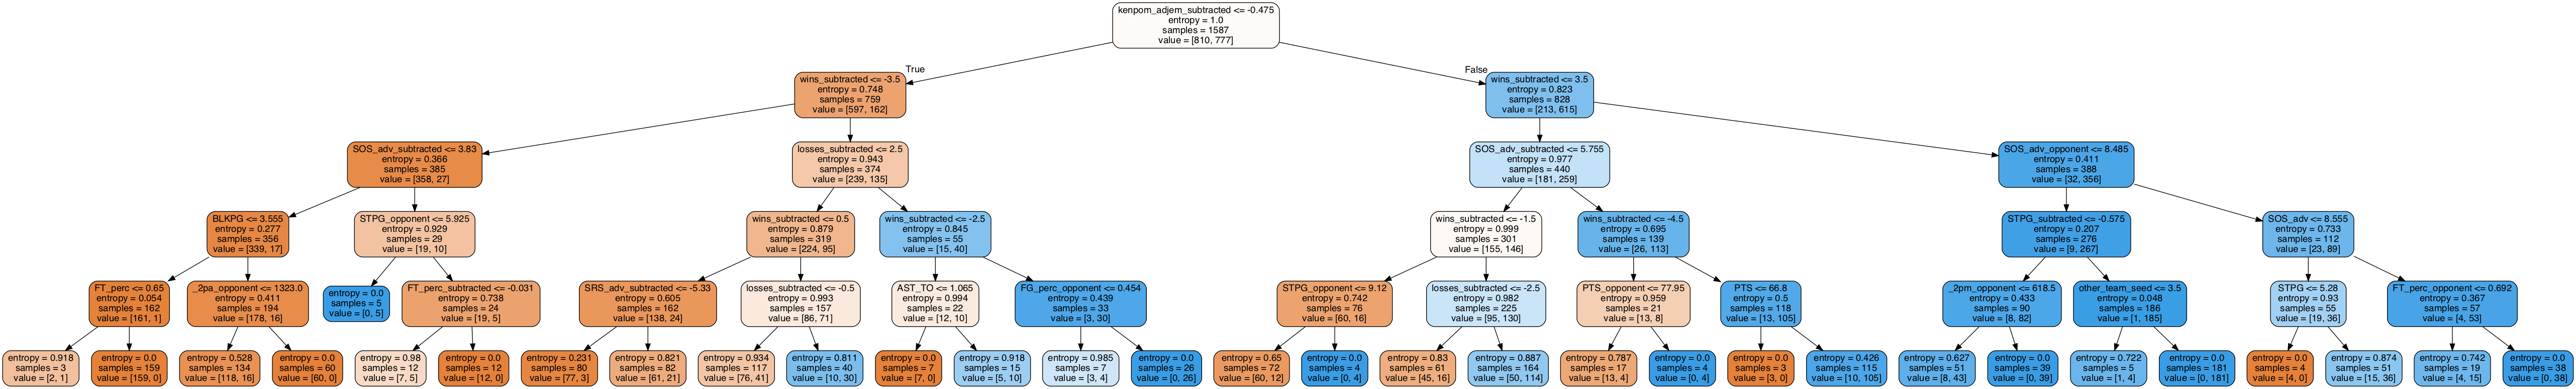

In [788]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
features = list(X.columns)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [789]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score


In [790]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.74      0.76      0.75       324
           1       0.78      0.75      0.76       357

    accuracy                           0.76       681
   macro avg       0.76      0.76      0.76       681
weighted avg       0.76      0.76      0.76       681



In [791]:
metrics.accuracy_score(y_test, predictions)


0.7562408223201175

# XGBoost

In [792]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [793]:
clf = XGBClassifier()


In [794]:
# Instantiate XGBClassifier
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [795]:
# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

In [796]:
# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 94.39%
Validation accuracy: 87.81%


# XGBoost - from medium article
https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7

In [797]:
from sklearn import datasets
import xgboost as xgb
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [798]:
y_train1 = pd.DataFrame(y_train)
X_train1 = pd.DataFrame(X_train, columns = X_test.columns)

In [799]:
D_train = xgb.DMatrix(X_train1, label=y_train1)
D_test = xgb.DMatrix(X_test, label=y_test)

In [800]:

param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [801]:

model = xgb.train(param, D_train, steps)

In [802]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.8571644367716875
Recall = 0.8577264239028946
Accuracy = 0.8575624082232012


# SVM

In [508]:
from time import time

In [826]:
from sklearn.svm import SVC  
tic = time()
svclassifier = SVC(kernel='rbf', C=1000) 
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 0.4265420436859131 seconds


In [827]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[286  38]
 [ 52 305]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       324
           1       0.89      0.85      0.87       357

    accuracy                           0.87       681
   macro avg       0.87      0.87      0.87       681
weighted avg       0.87      0.87      0.87       681

The accuracy score is 0.8678414096916299


# now testing for 2019 in SVM

In [779]:
_2019_predict=svclassifier.predict(df_2019.drop(['year','win'], axis = 1))

In [780]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(df_2019['win'],_2019_predict))  
print(classification_report(df_2019['win'],_2019_predict)) 
print("The accuracy score is" + " "+ str(accuracy_score(df_2019['win'], _2019_predict)))

[[56  7]
 [ 7 56]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        63
           1       0.89      0.89      0.89        63

    accuracy                           0.89       126
   macro avg       0.89      0.89      0.89       126
weighted avg       0.89      0.89      0.89       126

The accuracy score is 0.8888888888888888


In [764]:
test_2019=df_2019

In [765]:
test_2019['_2019_predict']=_2019_predict

In [1]:
test_2019[['team_seed','win','_2019_predict']]

In [647]:
#this is to try and cross validate
from sklearn.pipeline import Pipeline
etree_glove_small_tfidf = Pipeline([("glove vectorizer", TfidfEmbeddingVectorizer(glove_small)),
                                    ("extra trees", ExtraTreesClassifier(n_estimators=200))])
                                    
all_models = [
    ("glove_small_tfidf", etree_glove_small_tfidf)]
unsorted_scores = []
for name, model in all_models:
    print(f"Running model: {name}...")
    score = cross_val_score(model, X, y, cv=5, scoring="f1_micro").mean()
    print(f"Ran model: {name}... score: {score}")
    unsorted_scores.append((name, score))
scores = sorted(unsorted_scores, key=lambda x: -x[1])
print(tabulate(scores, floatfmt=".4f", headers=("model", 'score')))

NameError: name 'TfidfEmbeddingVectorizer' is not defined

In [498]:
len(y_test)

1021

In [541]:
testing=X_test

In [542]:
testing['predicts']=y_pred

In [543]:
testing['actual']=y_test

In [544]:
testing.to_csv('testing.csv')

# KNN

In [209]:
df1.head()

,point_difference,team_seed,win,higher_or_lower_seed,year_x,Name,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,pace_adv,ORtg_adv,eFG_perc_adv,SRS_adv_opponent,SOS_adv_opponent,pace_adv_opponent,ORtg_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,pace_adv_subtracted,ORtg_adv_subtracted,eFG_perc_adv_subtracted,round
0,15,1,1,1,2011,Ohio State,3.32,7.18,15.6,1.53,7.4,18.0,682.0,1282.0,0.532,77.1,0.494,0.413,0.705,11.2,23.3,34.5,16,25.84,8.38,64.1,120.0,0.563,-5.80,-4.93,68.8,102.0,0.491,31.64,13.31,-4.7,18.0,0.072,1
1,15,16,0,0,2011,UTSA,2.38,7.16,12.8,0.94,7.1,20.0,535.0,1130.0,0.473,70.9,0.431,0.356,0.706,10.7,24.3,35.0,1,-5.80,-4.93,68.8,102.0,0.491,25.84,8.38,64.1,120.0,0.563,-31.64,-13.31,4.7,-18.0,-0.072,1
2,1,8,1,1,2011,George Mason,3.31,6.75,14.3,1.31,6.7,17.0,614.0,1206.0,0.509,73.3,0.474,0.397,0.690,10.6,24.5,35.1,9,11.66,1.37,64.3,111.9,0.532,15.05,8.23,65.7,109.6,0.495,-3.39,-6.86,-1.4,2.3,0.037,1
3,1,9,0,0,2011,Villanova,3.75,6.34,13.8,1.15,6.3,18.0,574.0,1185.0,0.484,72.7,0.440,0.349,0.758,12.3,24.9,37.1,8,15.05,8.23,65.7,109.6,0.495,11.66,1.37,64.3,111.9,0.532,3.39,6.86,1.4,-2.3,-0.037,1
4,7,5,1,1,2011,West Virginia,4.29,4.61,15.1,1.25,6.3,19.0,540.0,1139.0,0.474,69.5,0.427,0.335,0.706,14.4,23.0,37.4,12,16.15,11.03,64.0,109.0,0.485,13.76,6.58,65.1,104.5,0.503,2.39,4.45,-1.1,4.5,-0.018,1


In [215]:
len(df1.columns)

37

In [536]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_test.columns)
scaled_df_train.head()

,point_difference,team_seed,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,eFG_perc_adv,SRS_adv_opponent,SOS_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,eFG_perc_adv_subtracted,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,BLKPG_subtracted,STPG_subtracted,APG_subtracted,AST_TO_subtracted,_3pm_subtracted,_3pa_subtracted,_2pm_subtracted,_2pa_subtracted,_2p_perc_subtracted,PTS_opponent,PTS_subtracted,FG_perc_subtracted,_3p_perc_subtracted,FT_perc_subtracted,ORPG_subtracted,DRPG_subtracted,RPG_subtracted,round,wins,losses,kenpom_adjem,wins_opponent,losses_opponent,kenpom_adjem_opponent,wins_subtracted,losses_subtracted,kenpom_adjem_subtracted
0,0.641173,1.364588,-0.118992,-0.895049,1.791261,-1.196115,0.992192,1.005620,1.193852,0.281764,1.437311,-2.042216,0.697357,-1.960090,-0.284893,0.142893,0.537641,-1.919536,-0.923481,-0.590079,-1.093794,-0.511174,-1.568444,0.414380,0.428565,-0.214019,-0.951495,-0.606889,-0.942152,0.578621,0.643824,0.836047,0.939805,-0.787267,-1.256091,1.234656,1.572168,-0.462536,0.371163,0.769492,0.390146,0.541842,0.493192,0.686087,-0.996254,0.851469,-1.444553,0.041625,1.372250,1.934375,-0.676702,-0.100709,-1.134380,0.804754,-0.079493,-1.599924,-0.718265,-0.174983,-0.002360,-1.787521,-1.129486,-0.758797,-1.651011,2.343066,-1.213525,-0.549742,0.119319,0.406466,-0.790573,1.475255,-1.031744
1,0.641173,1.364588,-0.118992,-0.727085,0.639211,-0.236899,-1.328128,-0.330312,-0.031463,-1.932338,-1.725155,-0.866124,-1.228609,-1.195523,-0.856865,-1.287576,0.377057,0.086626,0.305312,-0.590079,-1.375438,-1.682934,-1.136693,-0.066673,0.090908,-1.188227,-0.833293,-1.155487,0.041871,0.004234,0.132494,1.373935,0.790856,-2.166609,-2.156732,-0.297381,0.171996,-1.012229,-0.532821,-1.335205,0.136067,1.399814,-0.764656,0.405237,-0.491258,0.374916,-1.140346,-1.525284,1.428504,1.695010,-1.156881,-1.348328,0.110115,-0.600768,-0.449569,-0.456988,0.323465,-1.017281,-0.743552,0.633886,-0.070136,-0.758797,-1.428303,0.096853,-1.115641,-0.324305,-1.166654,-0.098995,-0.790573,0.836680,-0.653604
2,2.071309,-1.260118,-0.118137,-0.567119,0.741942,0.349288,-0.686337,-0.552967,-0.644120,-0.460536,-0.605698,0.240785,-0.446781,0.288636,-0.361156,-0.530269,0.002361,-0.441312,-0.291530,2.097025,0.583581,0.576889,0.158558,-3.525403,-3.055437,-1.305132,2.549576,2.326431,1.025893,-1.970712,0.932836,-1.154137,-2.188112,1.100253,1.445829,-2.403933,-1.931746,-1.699344,-2.250391,-0.646395,0.136067,-0.155261,-1.288759,-0.928801,0.964633,-0.134129,1.065157,1.074361,-1.271688,-1.656097,1.379916,0.948087,1.404389,-0.562781,0.084986,1.736214,0.193248,-0.475804,0.114671,0.633886,0.447221,-0.758797,0.130649,-1.186698,0.545966,-2.578674,2.691266,-3.532902,1.910994,-2.569055,2.554383
3,-0.788963,-0.603942,-0.118992,-0.511131,-1.356697,-1.675724,0.547875,0.486091,0.581194,-1.906741,-1.368328,-1.661715,-2.105782,-1.780192,-0.094235,0.928248,-1.068199,-0.441312,-0.993698,-1.261855,0.612716,0.510360,-0.861943,0.895433,0.443913,-0.097114,-0.163776,0.049470,-0.532142,2.348991,1.881390,0.513315,1.535599,-0.424283,-0.055238,0.915482,0.861633,0.190223,0.054769,-0.722930,-0.485014,0.541842,-1.236349,-0.472419,-1.947149,-2.376093,-1.558631,-0.706218,0.697202,0.498186,-1.999460,-1.586917,-1.333499,-0.087942,-1.450145,-1.260132,0.427638,1.008246,-1.172663,0.594832,-0.365768,0.889678,-0.092058,0.417740,0.635390,1.704627,-1.809641,0.862250,-1.267321,1.475255,-0.130563
4,0.402817,-0.385216,-0.118137,-0.223192,-0.520177,0.882186,0.054190,-0.478749,-0.337792,-0.486133,-0.269861,-0.554806,-0.465850,-0.520905,-0.437419,-0.558317,0.751753,0.614563,0.902155,1.425249,0.242279,0.246392,-0.430192,-0.437812,-0.134927,-1.422037,0.424587,0.246797,0.697886,0.570753,1.577556,0.889836,-0.500030,-

In [537]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [538]:
# Import the necessary functions
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.7
Recall Score: 0.7058823529411765
Accuracy Score: 0.6872246696035242
F1 Score: 0.7029288702928871


# Logistic Regression

# Neural Netowrk

# Some data analysis

In [99]:
test=X_test
test['predict']=y_pred
test['actual']=y_test

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
test

,point_difference,team_seed,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,pace_adv,ORtg_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,pace_adv_opponent,ORtg_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,pace_adv_subtracted,ORtg_adv_subtracted,eFG_perc_adv_subtracted,round,predict,actual
348,9,4,1,2.85,6.00,14.3,1.55,7.5,20.0,676.0,1263.0,0.535,75.2,0.484,0.383,0.707,10.7,24.5,35.1,13,21.28,10.05,64.1,116.1,0.549,2013,2.36,-3.27,64.0,113.1,0.539,18.92,13.32,0.1,3.0,0.010,1,1,1
229,3,10,0,2.56,6.50,14.6,1.13,5.3,18.0,651.0,1299.0,0.501,71.6,0.441,0.302,0.671,15.0,23.4,38.4,7,12.13,7.53,64.8,106.8,0.483,2012,13.86,3.25,66.4,110.7,0.535,-1.73,4.28,-1.6,-3.9,-0.052,1,1,0
228,3,7,1,3.29,6.81,13.7,1.03,6.4,17.0,575.0,1107.0,0.519,74.0,0.473,0.376,0.715,11.0,26.2,37.1,10,13.86,3.25,66.4,110.7,0.535,2012,12.13,7.53,64.8,106.8,0.483,1.73,-4.28,1.6,3.9,0.052,1,1,1
1069,15,16,0,2.78,6.78,13.2,1.06,8.8,25.0,553.0,1038.0,0.533,76.8,0.453,0.351,0.741,8.8,25.6,34.4,1,-4.78,-5.50,71.4,107.4,0.530,2019,23.94,11.35,75.9,112.7,0.529,-28.72,-16.85,-4.5,-5.3,0.001,1,0,0
715,3,4,0,4.18,6.39,13.5,1.37,9.3,24.0,599.0,1181.0,0.507,81.5,0.459,0.387,0.722,12.2,24.1,36.3,1,19.23,10.59,68.4,117.7,0.537,2016,18.05,8.64,69.5,112.8,0.525,1.18,1.95,-1.1,4.9,0.012,3,1,0
911,2,3,0,4.27,7.39,14.4,1.15,7.0,19.0,631.0,1226.0,0.515,75.2,0.464,0.366,0.701,11.0,24.9,35.9,1,19.38,9.60,68.3,108.4,0.520,2018,26.64,10.24,70.1,122.3,0.595,-7.26,-0.64,-1.8,-13.9,-0.075,4,0,0
793,9,13,0,4.41,5.68,13.4,1.19,6.4,17.0,697.0,1254.0,0.556,73.6,0.496,0.369,0.702,9.4,24.9,34.2,4,6.67,-3.27,65.4,112.4,0.554,2017,20.13,8.79,70.0,112.6,0.557,-13.46,-12.06,-4.6,-0.2,-0.003,1,0,0
85,11,12,0,4.12,6.12,15.0,1.40,7.9,20.0,581.0,1163.0,0.500,70.2,0.463,0.400,0.691,9.1,24.1,33.2,1,11.23,2.79,63.2,109.5,0.531,2011,24.10,7.62,69.7,116.0,0.570,-12.87,-4.83,-6.5,-6.5,-0.039,3,0,0
1067,2,3,0,4.91,7.38,14.0,1.13,7.3,20.0,605.0,1144.0,0.529,73.1,0.472,0.368,0.728,8.8,25.4,34.3,1,22.79,9.53,67.6,106.9,0.535,2019,27.79,5.01,71.7,122.2,0.590,-5.00,4.52,-4.1,-15.3,-0.055,4,0,1
662,1,8,1,5.00,5.21,13.8,1.03,7.6,19.0,592.0,1342.0,0.441,76.0,0.425,0.392,0.738,13.2,29.2,42.4,9,12.04,7.64,70.8,106.3,0.488,2016,15.89,6.28,66.1,109.0,0.516,-3.85,1.36,4.7,-2.7,-0.028,1,0,0


In [106]:
i = 0
correct_incorrect = []
for thing in list(test['actual']):
    if list(test['predict'])[i]==thing:
        correct_incorrect.append(1)
        i+=1
    else:
        correct_incorrect.append(0)
        i+=1

In [107]:
test['correct_incorrect']=correct_incorrect

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
pd.set_option('display.max_rows', 400)
test

,point_difference,team_seed,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,pace_adv,ORtg_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,pace_adv_opponent,ORtg_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,pace_adv_subtracted,ORtg_adv_subtracted,eFG_perc_adv_subtracted,round,predict,actual,correct_incorrect
348,9,4,1,2.85,6.00,14.3,1.55,7.5,20.0,676.0,1263.0,0.535,75.2,0.484,0.383,0.707,10.7,24.5,35.1,13,21.28,10.05,64.1,116.1,0.549,2013,2.36,-3.27,64.0,113.1,0.539,18.92,13.32,0.1,3.0,0.010,1,1,1,1
229,3,10,0,2.56,6.50,14.6,1.13,5.3,18.0,651.0,1299.0,0.501,71.6,0.441,0.302,0.671,15.0,23.4,38.4,7,12.13,7.53,64.8,106.8,0.483,2012,13.86,3.25,66.4,110.7,0.535,-1.73,4.28,-1.6,-3.9,-0.052,1,1,0,0
228,3,7,1,3.29,6.81,13.7,1.03,6.4,17.0,575.0,1107.0,0.519,74.0,0.473,0.376,0.715,11.0,26.2,37.1,10,13.86,3.25,66.4,110.7,0.535,2012,12.13,7.53,64.8,106.8,0.483,1.73,-4.28,1.6,3.9,0.052,1,1,1,1
1069,15,16,0,2.78,6.78,13.2,1.06,8.8,25.0,553.0,1038.0,0.533,76.8,0.453,0.351,0.741,8.8,25.6,34.4,1,-4.78,-5.50,71.4,107.4,0.530,2019,23.94,11.35,75.9,112.7,0.529,-28.72,-16.85,-4.5,-5.3,0.001,1,0,0,1
715,3,4,0,4.18,6.39,13.5,1.37,9.3,24.0,599.0,1181.0,0.507,81.5,0.459,0.387,0.722,12.2,24.1,36.3,1,19.23,10.59,68.4,117.7,0.537,2016,18.05,8.64,69.5,112.8,0.525,1.18,1.95,-1.1,4.9,0.012,3,1,0,0
911,2,3,0,4.27,7.39,14.4,1.15,7.0,19.0,631.0,1226.0,0.515,75.2,0.464,0.366,0.701,11.0,24.9,35.9,1,19.38,9.60,68.3,108.4,0.520,2018,26.64,10.24,70.1,122.3,0.595,-7.26,-0.64,-1.8,-13.9,-0.075,4,0,0,1
793,9,13,0,4.41,5.68,13.4,1.19,6.4,17.0,697.0,1254.0,0.556,73.6,0.496,0.369,0.702,9.4,24.9,34.2,4,6.67,-3.27,65.4,112.4,0.554,2017,20.13,8.79,70.0,112.6,0.557,-13.46,-12.06,-4.6,-0.2,-0.003,1,0,0,1
85,11,12,0,4.12,6.12,15.0,1.40,7.9,20.0,581.0,1163.0,0.500,70.2,0.463,0.400,0.691,9.1,24.1,33.2,1,11.23,2.79,63.2,109.5,0.531,2011,24.10,7.62,69.7,116.0,0.570,-12.87,-4.83,-6.5,-6.5,-0.039,3,0,0,1
1067,2,3,0,4.91,7.38,14.0,1.13,7.3,20.0,605.0,1144.0,0.529,73.1,0.472,0.368,0.728,8.8,25.4,34.3,1,22.79,9.53,67.6,106.9,0.535,2019,27.79,5.01,71.7,122.2,0.590,-5.00,4.52,-4.1,-15.3,-0.055,4,0,1,0
662,1,8,1,5.00,5.21,13.8,1.03,7.6,19.0,592.0,1342.0,0.441,76.0,0.425,0.392,0.738,13.2,29.2,42.4,9,12.04,7.64,70.8,106.3,0.488,2016,15.89,6.28,66.1,109.0,0.516,-3.85,1.36,4.7,-2.7,-0.028,1,0,0,1


In [115]:
incorrect=test[(test['correct_incorrect']==0)]

In [116]:
correct = test[(test['correct_incorrect']==1)]

In [119]:
wins = test[(test['actual']==1)]

In [121]:
wins_correct=wins[(wins['correct_incorrect']==1)]

In [122]:
wins_incorrect=wins[(wins['correct_incorrect']==0)]

In [120]:
losses = test[(test['actual']==0)]

In [128]:
losses_correct=losses[(losses['correct_incorrect']==1)]

In [129]:
losses_incorrect=losses[(losses['correct_incorrect']==0)]

In [118]:
correct[['actual','predict','round','correct_incorrect','higher_or_lower_seed','point_difference']]

,actual,predict,round,correct_incorrect,higher_or_lower_seed,point_difference
348,1,1,1,1,1,9
228,1,1,1,1,1,3
1069,0,0,1,1,0,15
911,0,0,4,1,0,2
793,0,0,1,1,0,9
85,0,0,3,1,0,11
662,0,0,1,1,1,1
426,0,0,2,1,0,8
594,1,1,1,1,1,15
542,1,1,1,1,1,5


In [133]:
wins_incorrect

,point_difference,team_seed,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,pace_adv,ORtg_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,pace_adv_opponent,ORtg_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,pace_adv_subtracted,ORtg_adv_subtracted,eFG_perc_adv_subtracted,round,predict,actual,correct_incorrect
1067,2,3,0,4.91,7.38,14.0,1.13,7.3,20.0,605.0,1144.0,0.529,73.1,0.472,0.368,0.728,8.8,25.4,34.3,1,22.79,9.53,67.6,106.9,0.535,2019,27.79,5.01,71.7,122.2,0.590,-5.00,4.52,-4.1,-15.3,-0.055,4,0,1,0
1130,1,3,0,4.91,7.38,14.0,1.13,7.3,20.0,605.0,1144.0,0.529,73.1,0.472,0.368,0.728,8.8,25.4,34.3,2,22.79,9.53,67.6,106.9,0.535,2019,24.93,12.34,68.1,113.1,0.552,-2.14,-2.81,-0.5,-6.2,-0.017,5,0,1,0
67,9,13,0,3.21,8.61,12.3,0.82,5.8,17.0,619.0,1201.0,0.515,69.8,0.459,0.340,0.675,13.8,23.7,37.5,4,2.81,-3.13,64.3,106.2,0.509,2011,18.60,8.20,67.8,108.6,0.526,-15.79,-11.33,-3.5,-2.4,-0.017,1,0,1,0
869,5,2,1,3.24,5.50,13.8,1.21,6.7,17.0,662.0,1297.0,0.510,76.3,0.476,0.398,0.758,10.3,26.5,36.8,7,18.25,7.63,67.3,113.8,0.537,2017,16.75,2.19,61.3,117.6,0.578,1.50,5.44,6.0,-3.8,-0.041,2,0,1,0
689,1,2,0,3.41,6.74,16.1,1.45,8.6,25.0,614.0,1089.0,0.564,77.0,0.467,0.344,0.777,9.3,26.4,35.6,1,24.08,9.71,67.3,115.4,0.561,2016,23.87,11.22,69.7,115.0,0.564,0.21,-1.51,-2.4,0.4,-0.003,4,0,1,0
86,1,11,0,3.68,8.53,14.2,1.23,8.2,23.0,547.0,1121.0,0.488,71.5,0.435,0.359,0.719,10.9,21.1,32.0,10,8.56,3.78,65.3,108.3,0.511,2011,13.48,6.45,69.3,99.3,0.490,-4.92,-2.67,-4.0,9.0,0.021,3,0,1,0
973,15,16,0,2.50,7.53,15.4,1.28,10.2,26.0,540.0,1099.0,0.491,73.9,0.445,0.387,0.649,9.9,24.9,34.8,1,-2.02,-3.84,69.2,105.6,0.531,2018,22.21,9.07,60.6,110.4,0.527,-24.23,-12.91,8.6,-4.8,0.004,1,0,1,0
317,7,12,0,5.12,8.39,12.6,1.12,6.9,21.0,671.0,1368.0,0.490,78.2,0.437,0.331,0.684,13.2,25.6,38.8,5,14.42,4.14,70.5,108.4,0.491,2013,18.76,9.73,61.4,104.4,0.486,-4.34,-5.59,9.1,4.0,0.005,1,0,1,0
161,7,12,0,3.71,10.68,12.2,1.07,7.4,22.0,537.0,1177.0,0.456,68.4,0.410,0.337,0.689,12.4,21.3,33.7,5,8.79,0.63,65.2,103.6,0.476,2012,17.42,3.80,67.0,113.3,0.543,-8.63,-3.17,-1.8,-9.7,-0.067,1,0,1,0
42,3,7,1,5.81,5.47,14.6,0.98,5.2,16.0,619.0,1216.0,0.509,70.0,0.456,0.329,0.683,11.8,25.5,37.3,10,11.70,7.93,66.8,103.8,0.502,2011,13.70,11.67,66.0,103.1,0.489,-2.00,-3.74,0.8,0.7,0.013,1,0,1,0
